## Intersection Matrix

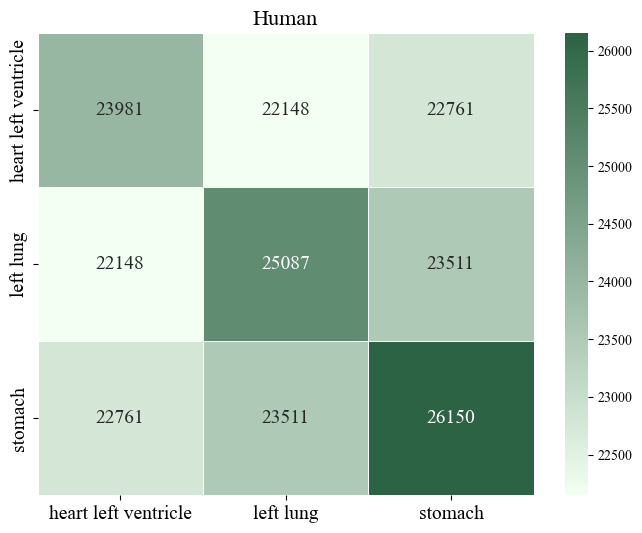

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from matplotlib.colors import LinearSegmentedColormap

# Define your custom color map
colors = ["#F2FFF2","#2C6344"]  
cmap = LinearSegmentedColormap.from_list("yellow", colors, N=256)

rcParams['font.family'] = 'Times New Roman'

# Read multiple CSV files and extract the 'lncRNA_id' column
file1 = pd.read_csv('deduplicated_human_heart_essential_genes.csv',header=None,names=['lncRNA_id'])  
file2 = pd.read_csv('deduplicated_human_lung_essential_genes.csv',header=None,names=['lncRNA_id'])  
file3 = pd.read_csv('deduplicated_human_stomach_essential_genes.csv',header=None,names=['lncRNA_id'])

# Extract 'lncRNA_id' columns and convert them to sets for intersection calculation
set1 = set(file1['lncRNA_id'])  
set2 = set(file2['lncRNA_id'])
set3 = set(file3['lncRNA_id'])

# Create a DataFrame representing the intersection size between the sets
intersection_matrix = pd.DataFrame({
    'heart left ventricle': [len(set1), len(set1 & set2), len(set1 & set3)],
    'left lung': [len(set1 & set2), len(set2), len(set2 & set3)],
    'stomach': [len(set1 & set3), len(set2 & set3), len(set3)]
}, index=['heart left ventricle', 'left lung', 'stomach'])

# Create the heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(intersection_matrix, annot=True, cmap=cmap, cbar=True, fmt="d", linewidths=0.5, 
            annot_kws={"size": 14},  # Adjust font size of the annotations
            xticklabels=intersection_matrix.columns,  # Ensure x-tick labels are clear
            yticklabels=intersection_matrix.index)  # Ensure y-tick labels are clear

# Set the font size for x and y axis labels
plt.xticks(fontsize=14)  # Set x-axis label font size
plt.yticks(fontsize=14)  # Set y-axis label font size

# Set the title of the plot
plt.title("Human", fontsize=16)

# Show the plot
plt.savefig("human_ess_intersection_matrix.svg")

# Display the plot
plt.show()

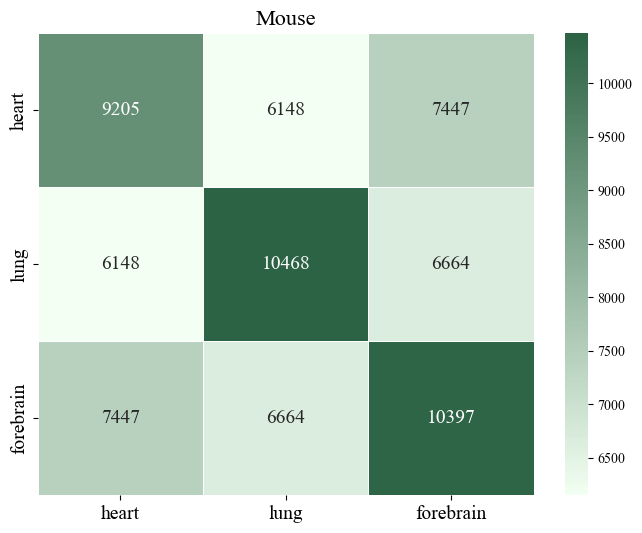

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from matplotlib.colors import LinearSegmentedColormap

# Define your custom color map
colors = ["#F2FFF2","#2C6344"]  
cmap = LinearSegmentedColormap.from_list("yellow", colors, N=256)

rcParams['font.family'] = 'Times New Roman'

# Read multiple CSV files and extract the 'lncRNA_ID' column
file1 = pd.read_csv('deduplicated_mouse_heart_essential_genes.csv',header=None,names=['lncRNA_ID'])  
file2 = pd.read_csv('deduplicated_mouse_lung_essential_genes.csv',header=None,names=['lncRNA_ID'])  
file3 = pd.read_csv('deduplicated_mouse_brain_essential_genes.csv',header=None,names=['lncRNA_ID'])

# Extract 'lncRNA_ID' columns and convert them to sets for intersection calculation
set1 = set(file1['lncRNA_ID'])  
set2 = set(file2['lncRNA_ID'])
set3 = set(file3['lncRNA_ID'])

# Create a DataFrame representing the intersection size between the sets
intersection_matrix = pd.DataFrame({
    'heart': [len(set1), len(set1 & set2), len(set1 & set3)],
    'lung': [len(set1 & set2), len(set2), len(set2 & set3)],
    'forebrain': [len(set1 & set3), len(set2 & set3), len(set3)]
}, index=['heart', 'lung', 'forebrain'])

# Create the heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(intersection_matrix, annot=True, cmap=cmap, cbar=True, fmt="d", linewidths=0.5, 
            annot_kws={"size": 14},  # Adjust font size of the annotations
            xticklabels=intersection_matrix.columns,  # Ensure x-tick labels are clear
            yticklabels=intersection_matrix.index)  # Ensure y-tick labels are clear

# Set the font size for x and y axis labels
plt.xticks(fontsize=14)  # Set x-axis label font size
plt.yticks(fontsize=14)  # Set y-axis label font size

# Set the title of the plot
plt.title("Mouse", fontsize=16)

# Show the plot
plt.savefig("mouse_ess_intersection_matrix.svg")

# Display the plot
plt.show()

/home/swt0418/anaconda3/envs/esslnc/lib/python3.11/site-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


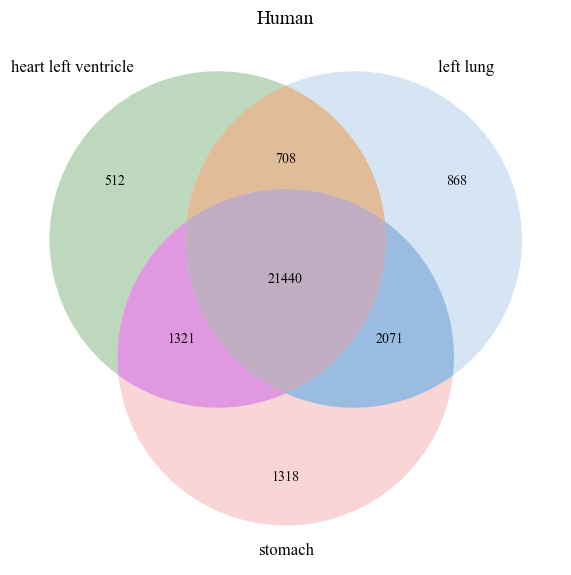

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# === 1) File paths  ===
file1 = pd.read_csv('deduplicated_human_heart_essential_genes.csv',header=None)  
file2 = pd.read_csv('deduplicated_human_lung_essential_genes.csv',header=None)  
file3 = pd.read_csv('deduplicated_human_stomach_essential_genes.csv',header=None)


# === 2) Read data into sets ===
A = set(file1.iloc[:, 0].dropna().astype(str).unique())
B = set(file2.iloc[:, 0].dropna().astype(str).unique())
C = set(file3.iloc[:, 0].dropna().astype(str).unique())

# === 3) Plot Venn diagram without weighted areas ===
plt.figure(figsize=(6, 6))
venn = venn3_unweighted([A, B, C], set_labels=("heart left ventricle", "left lung", "stomach"))

# === 4) Customize colors (example: red, green, blue with some transparency) ===
# Set colors only for the three main circles
# "100" = only A, "010" = only B, "001" = only C
venn.get_patch_by_id("100").set_facecolor("#7fb27f")  # A's base color
venn.get_patch_by_id("010").set_facecolor("#accce9")  # B's base color
venn.get_patch_by_id("001").set_facecolor("#f7acaf")  # C's base color

# Adjust transparency
for subset in ("100", "010", "001"):
    venn.get_patch_by_id(subset).set_alpha(0.5)

# === 5) Add title ===
plt.title("Human", fontsize=14)

# === 6) Save as SVG ===
plt.tight_layout()
plt.savefig("venn_human.svg", format="svg")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# === 1) File paths  ===
file1 = pd.read_csv('deduplicated_mouse_heart_essential_genes.csv',header=None,names=['lncRNA_id'])  
file2 = pd.read_csv('deduplicated_mouse_lung_essential_genes.csv',header=None,names=['lncRNA_id'])  
file3 = pd.read_csv('deduplicated_mouse_brain_essential_genes.csv',header=None,names=['lncRNA_id'])

# === 2) Read data into sets ===
A = set(file1.iloc[:, 0].dropna().astype(str).unique())
B = set(file2.iloc[:, 0].dropna().astype(str).unique())
C = set(file3.iloc[:, 0].dropna().astype(str).unique())

# === 3) Plot Venn diagram without weighted areas ===
plt.figure(figsize=(6, 6))
venn = venn3_unweighted([A, B, C], set_labels=("heart", "lung", "brain"))

# === 4) Customize colors (example: red, green, blue with some transparency) ===
colors = ["#7fb27f", "#accce9", "#f7acaf"]
for idx, patch in venn.patches.items():
    if patch:  # Some patches may be None if there is no overlap
        patch.set_facecolor(colors[int(idx[0]) - 1])  # idx[0] indicates which set
        patch.set_alpha(0.5)

# === 5) Add title ===
plt.title("Mouse", fontsize=14)

# === 6) Save as SVG ===
plt.tight_layout()
plt.savefig("venn_mouse.svg", format="svg", dpi=300)
plt.show()
